In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

# Import P2 Dataset



In [2]:
df_train = pd.read_csv("C:/Users/heera/OneDrive - Heerak/Desktop/CE802 P2/CE802_P2_Data.csv")
df_train.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,4.92,-13.23,330,13.22,-5.51,41.10,16.72,-56.98,-748.72,20,9.75,259.66,8.00,-0.35,4.76,False
1,-9.33,-27.72,3,12.78,-9.12,5.31,9.90,-30.98,-436.72,2,-1.56,131.66,0.76,1.79,NaN,False
2,-15.09,-26.28,6,13.54,-7.75,5.67,9.93,-34.98,-482.72,2,-2.58,63.66,0.64,2.02,NaN,True
3,-18.09,-24.60,30,13.28,-8.61,3.51,10.02,-30.98,-414.72,2,-7.08,133.66,0.57,1.98,NaN,True
4,6.12,-8.64,300,14.94,-1.97,29.40,19.32,-36.98,-428.72,20,9.09,229.66,6.70,-3.83,NaN,True


# Checking Null / Missing values

In [3]:
df_train.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15      750
Class      0
dtype: int64

In [56]:
df_train.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,-4.569780,-20.474600,109.024667,12.744707,-6.248787,14.90628,13.107813,-42.25600,-557.610667,10.806667,3.878840,108.488000,3.854280,0.147533,5.783013,0.460667
std,7.662813,7.635517,117.334580,2.217929,2.540644,12.97563,3.166909,14.31863,142.833748,9.009814,7.541549,80.376896,3.465276,2.491236,0.710488,0.498617
min,-29.760000,-45.570000,0.000000,8.020000,-15.280000,0.00000,9.420000,-76.98000,-888.720000,0.000000,-19.110000,-120.340000,0.000000,-4.360000,3.060000,0.000000
25%,-10.260000,-26.130000,15.000000,11.440000,-8.130000,3.72000,10.140000,-56.98000,-678.720000,2.000000,-1.950000,71.660000,0.600000,-2.230000,5.783013,0.000000
50%,-7.560000,-23.445000,50.000000,12.440000,-7.230000,6.21000,10.500000,-34.98000,-486.720000,2.000000,0.930000,97.660000,1.020000,1.100000,5.783013,0.000000
75%,2.917500,-13.110000,195.000000,13.900000,-3.770000,24.60000,15.870000,-30.98000,-446.720000,20.000000,11.100000,139.660000,7.050000,1.982500,5.790000,1.000000
max,8.850000,-6.780000,390.000000,21.220000,-1.590000,47.10000,19.570000,-24.98000,-398.720000,20.000000,17.310000,309.660000,10.350000,7.880000,8.140000,1.000000


In [5]:
df_train = df_train
df_train.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,4.92,-13.23,330,13.22,-5.51,41.10,16.72,-56.98,-748.72,20,9.75,259.66,8.00,-0.35,4.76,False
1,-9.33,-27.72,3,12.78,-9.12,5.31,9.90,-30.98,-436.72,2,-1.56,131.66,0.76,1.79,NaN,False
2,-15.09,-26.28,6,13.54,-7.75,5.67,9.93,-34.98,-482.72,2,-2.58,63.66,0.64,2.02,NaN,True
3,-18.09,-24.60,30,13.28,-8.61,3.51,10.02,-30.98,-414.72,2,-7.08,133.66,0.57,1.98,NaN,True
4,6.12,-8.64,300,14.94,-1.97,29.40,19.32,-36.98,-428.72,20,9.09,229.66,6.70,-3.83,NaN,True


In [6]:
df_train.nunique()

F1       660
F2       650
F3       141
F4       432
F5       646
F6       400
F7       214
F8        11
F9        91
F10        4
F11      656
F12       80
F13      216
F14      649
F15      331
Class      2
dtype: int64

# Drop the Column F15 (with Missing values) and create baseline models

In [7]:
data = df_train.copy()
data.drop(['F15'],axis=1,inplace=True)
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,Class
0,4.92,-13.23,330,13.22,-5.51,41.10,16.72,-56.98,-748.72,20,9.75,259.66,8.00,-0.35,False
1,-9.33,-27.72,3,12.78,-9.12,5.31,9.90,-30.98,-436.72,2,-1.56,131.66,0.76,1.79,False
2,-15.09,-26.28,6,13.54,-7.75,5.67,9.93,-34.98,-482.72,2,-2.58,63.66,0.64,2.02,True
3,-18.09,-24.60,30,13.28,-8.61,3.51,10.02,-30.98,-414.72,2,-7.08,133.66,0.57,1.98,True
4,6.12,-8.64,300,14.94,-1.97,29.40,19.32,-36.98,-428.72,20,9.09,229.66,6.70,-3.83,True


In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])

# Baseline model 1 after dropping column "F15" - Classification model - Decision Tree 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix

In [10]:
X = data[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14']]
y = data["Class"]


# Split the data into X and Y to apply Baseline models

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state =6)


In [12]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Decision Tree")
print('---------------------')
print(classification_report(y_test, y_pred))

Decision Tree
---------------------
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       241
           1       0.74      0.75      0.75       209

    accuracy                           0.76       450
   macro avg       0.76      0.76      0.76       450
weighted avg       0.76      0.76      0.76       450



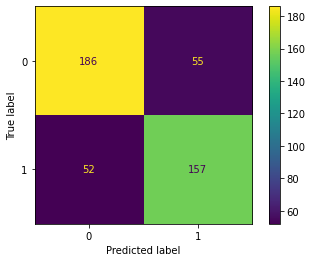

In [13]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

#  Baseline model 2 after dropping column "F15" - Classification model - Random forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_predrf = rf.predict(X_test)
print(classification_report(y_test,y_predrf))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82       241
           1       0.77      0.83      0.80       209

    accuracy                           0.81       450
   macro avg       0.81      0.81      0.81       450
weighted avg       0.81      0.81      0.81       450



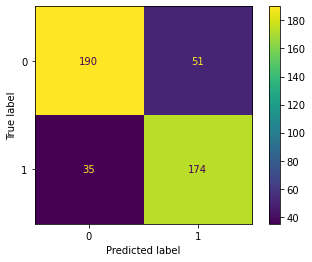

In [15]:
plot_confusion_matrix(rf, X_test, y_test)  
plt.show()

# Baseline model 3 after dropping column "F15"  - Classification model - Random forest Classifier

In [16]:
from sklearn import svm
from sklearn.svm import SVC  
model = SVC(kernel='rbf', random_state=0)   # SVC Model
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
print('SVM')
print('---------------------')
print(classification_report(y_test, y_pred))
print('')

SVM
---------------------
              precision    recall  f1-score   support

           0       0.63      0.48      0.54       241
           1       0.53      0.67      0.59       209

    accuracy                           0.57       450
   macro avg       0.58      0.58      0.57       450
weighted avg       0.58      0.57      0.57       450




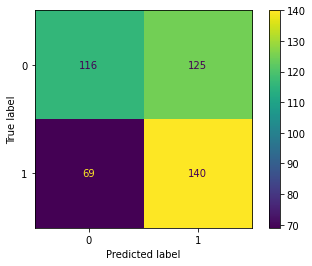

In [17]:
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

# Imputers for treating missing values

In [18]:
from sklearn.impute import SimpleImputer as Imputer
mean_imputer = Imputer(strategy='mean')
mode_imputer = Imputer(strategy='most_frequent') 
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=2)

# Mode Imputer

In [19]:
# mode_imputer.fit(df_train[['F15']])
# df_train['F15'] = mode_imputer.transform(df_train[['F15']])
# df = df_train

# KNN Imputer

In [20]:
# knn_imputer.fit(df_train[['F15']])
# df_train['F15'] = knn_imputer.transform(df_train[['F15']])
# df = df_train

In [21]:
df_train.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,4.92,-13.23,330,13.22,-5.51,41.10,16.72,-56.98,-748.72,20,9.75,259.66,8.00,-0.35,4.76,False
1,-9.33,-27.72,3,12.78,-9.12,5.31,9.90,-30.98,-436.72,2,-1.56,131.66,0.76,1.79,NaN,False
2,-15.09,-26.28,6,13.54,-7.75,5.67,9.93,-34.98,-482.72,2,-2.58,63.66,0.64,2.02,NaN,True
3,-18.09,-24.60,30,13.28,-8.61,3.51,10.02,-30.98,-414.72,2,-7.08,133.66,0.57,1.98,NaN,True
4,6.12,-8.64,300,14.94,-1.97,29.40,19.32,-36.98,-428.72,20,9.09,229.66,6.70,-3.83,NaN,True


# Mean Imputer

In [22]:
mean_imputer.fit(df_train[['F15']])
df_train['F15'] = mean_imputer.transform(df_train[['F15']])
df = df_train

# KNN and Mean Imputers are better to treat this missing values , mode imputer is skewed. Hence, we have used Mean imputer to replace missing values

In [23]:
df.isnull().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
Class    0
dtype: int64

In [24]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,4.92,-13.23,330,13.22,-5.51,41.10,16.72,-56.98,-748.72,20,9.75,259.66,8.00,-0.35,4.760000,False
1,-9.33,-27.72,3,12.78,-9.12,5.31,9.90,-30.98,-436.72,2,-1.56,131.66,0.76,1.79,5.783013,False
2,-15.09,-26.28,6,13.54,-7.75,5.67,9.93,-34.98,-482.72,2,-2.58,63.66,0.64,2.02,5.783013,True
3,-18.09,-24.60,30,13.28,-8.61,3.51,10.02,-30.98,-414.72,2,-7.08,133.66,0.57,1.98,5.783013,True
4,6.12,-8.64,300,14.94,-1.97,29.40,19.32,-36.98,-428.72,20,9.09,229.66,6.70,-3.83,5.783013,True


# Label Encoder for Categorical Column "Class"

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [26]:
df['Class'] = label_encoder.fit_transform(df['Class'])

In [27]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,4.92,-13.23,330,13.22,-5.51,41.10,16.72,-56.98,-748.72,20,9.75,259.66,8.00,-0.35,4.760000,0
1,-9.33,-27.72,3,12.78,-9.12,5.31,9.90,-30.98,-436.72,2,-1.56,131.66,0.76,1.79,5.783013,0
2,-15.09,-26.28,6,13.54,-7.75,5.67,9.93,-34.98,-482.72,2,-2.58,63.66,0.64,2.02,5.783013,1
3,-18.09,-24.60,30,13.28,-8.61,3.51,10.02,-30.98,-414.72,2,-7.08,133.66,0.57,1.98,5.783013,1
4,6.12,-8.64,300,14.94,-1.97,29.40,19.32,-36.98,-428.72,20,9.09,229.66,6.70,-3.83,5.783013,1


# Histogram of each Columns

array([[<AxesSubplot:title={'center':'F1'}>,
        <AxesSubplot:title={'center':'F2'}>,
        <AxesSubplot:title={'center':'F3'}>,
        <AxesSubplot:title={'center':'F4'}>],
       [<AxesSubplot:title={'center':'F5'}>,
        <AxesSubplot:title={'center':'F6'}>,
        <AxesSubplot:title={'center':'F7'}>,
        <AxesSubplot:title={'center':'F8'}>],
       [<AxesSubplot:title={'center':'F9'}>,
        <AxesSubplot:title={'center':'F10'}>,
        <AxesSubplot:title={'center':'F11'}>,
        <AxesSubplot:title={'center':'F12'}>],
       [<AxesSubplot:title={'center':'F13'}>,
        <AxesSubplot:title={'center':'F14'}>,
        <AxesSubplot:title={'center':'F15'}>,
        <AxesSubplot:title={'center':'Class'}>]], dtype=object)

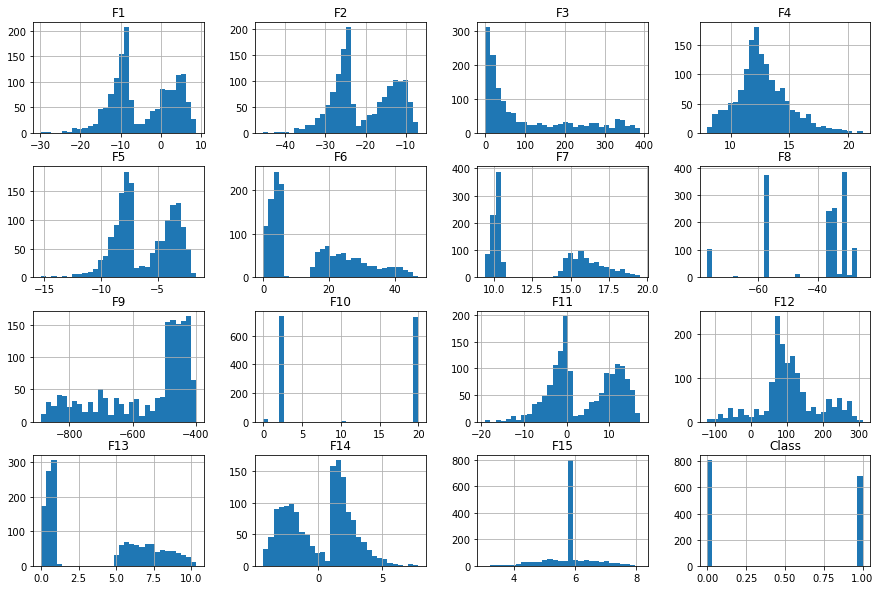

In [28]:
 df.hist(bins=30, figsize=(15, 10))

# Check value counts of target column and whether "Class" is balanced or not

In [29]:
dat = df["Class"].value_counts()
print(dat)

0    809
1    691
Name: Class, dtype: int64


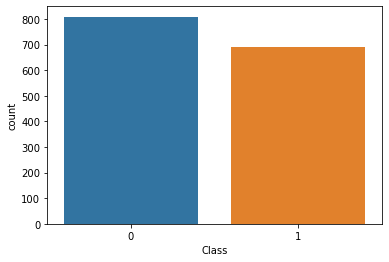

In [30]:
sns.countplot(x='Class',data=df)
plt.show()

# Heatmap to check Correlation

<AxesSubplot:>

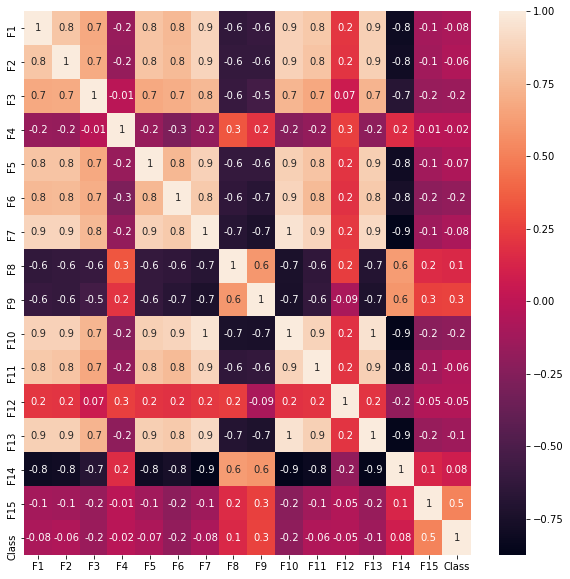

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, fmt='.1g')

# Splitting data and scaler transformation of data to normalize features

In [32]:
from sklearn import preprocessing
X1= df_train[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14','F15']]
y1 = df_train["Class"]
min_max_scaler = preprocessing.MinMaxScaler()
X1_scaler = min_max_scaler.fit_transform(X1)


In [33]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1_scaler, y1,test_size=0.3,random_state =6)


# Decision Tree Classifier - Final Classification Model 1

In [34]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [59]:
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier(max_features= 15,
 max_depth= 60,
 criterion= 'gini')
# Train Decision Tree Classifer
clf1 = clf1.fit(X_train1,y_train1)
#Predict the response for test dataset
y_preddt = clf1.predict(X_test1)
print("Decision Tree")
print('---------------------')
print(classification_report(y_test1, y_preddt))

Decision Tree
---------------------
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       241
           1       0.70      0.74      0.72       209

    accuracy                           0.74       450
   macro avg       0.73      0.74      0.73       450
weighted avg       0.74      0.74      0.74       450



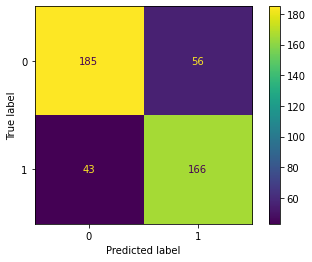

In [36]:
plot_confusion_matrix(clf1, X_test1, y_test1)  
plt.show()

# Random forest Classifier - Final Classification model 2 (Hyperparameter tuned with Randomized Search CV)

In [37]:
rf1 = RandomForestClassifier()
parameters = {"n_estimators":[10,100],
              'criterion':['gini','entropy'],
             'max_depth':[20,60,'None','sqrt'],
             'bootstrap':['True','False']}
random = RandomizedSearchCV(estimator=rf,param_distributions=parameters,scoring="f1_weighted",verbose=1,n_jobs=-1)
random.fit(X_train1,y_train1)
random.best_params_,random.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.9s finished


({'n_estimators': 100,
  'max_depth': 60,
  'criterion': 'gini',
  'bootstrap': 'True'},
 0.8751688845167367)

In [38]:
rf1 = RandomForestClassifier(n_estimators =100,
  max_depth=60,
  criterion= 'entropy',
  bootstrap= 'False')
rf1.fit(X_train1,y_train1)
y_predr = rf1.predict(X_test1)
print("Random Forest Classifier")
print('---------------------')
print(classification_report(y_test1, y_predr))


Random Forest Classifier
---------------------
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       241
           1       0.80      0.86      0.83       209

    accuracy                           0.84       450
   macro avg       0.84      0.84      0.84       450
weighted avg       0.84      0.84      0.84       450



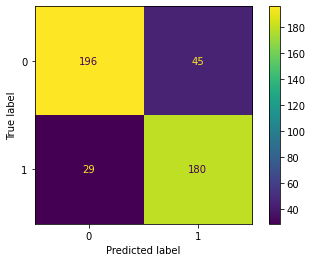

In [39]:
plot_confusion_matrix(rf1, X_test1, y_test1)  
plt.show()

# Support Vector Machine - Final Classification model 2 (Hyperparameter tuned with GridSearch CV)

In [40]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [100,125,150], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['rbf'] } 
  
grid = GridSearchCV(svm.SVC(random_state=0), param_grid,verbose=1,n_jobs=-1,cv=10)
  
# fitting the model for grid search
grid.fit(X_train1, y_train1)
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test1)
  
# print classification report
print(classification_report(y_test1, grid_predictions))

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s


{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, gamma=1, random_state=0)
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       241
           1       0.86      0.91      0.89       209

    accuracy                           0.89       450
   macro avg       0.89      0.89      0.89       450
weighted avg       0.89      0.89      0.89       450



[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.7s finished


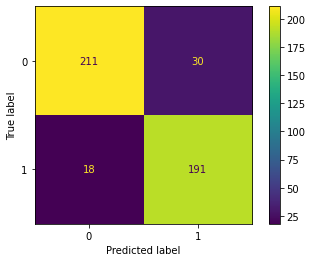

In [41]:
plot_confusion_matrix(grid, X_test1, y_test1)  
plt.show()

# Test Dataset P2 

# Applying SVM Model on Test Dataset as SVM hyperparameter tuned using GridSearchCV

In [42]:
df_test = pd.read_csv("C:/Users/heera/OneDrive - Heerak/Desktop/CE802 P2/CE802_P2_Test.csv")
df_test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-8.67,-25.56,21,13.14,-7.45,5.55,10.29,-30.98,-476.72,2,-1.17,61.66,0.23,3.76,7.60,True
1,-8.31,-29.19,10,12.16,-7.66,5.22,10.22,-30.98,-422.72,2,-0.96,79.66,0.02,1.22,6.72,False
2,-0.84,-25.29,110,12.34,-3.72,20.70,17.32,-76.98,-778.72,20,11.10,-20.34,5.75,-1.97,NaN,False
3,0.90,-14.94,120,9.44,-3.44,28.05,15.52,-56.98,-858.72,20,6.33,229.66,8.05,-1.77,NaN,False
4,-0.33,-9.60,345,14.26,-3.32,34.80,15.07,-36.98,-458.72,20,12.18,129.66,9.80,-2.17,6.60,False


# Mean imputer to replace missing values of Column "F15"


In [43]:
mean_imputer.fit(df_test[['F15']])
df_test['F15'] = mean_imputer.transform(df_test[['F15']])
df = df_test

In [44]:
df.drop("Class",axis=1)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
0,-8.67,-25.56,21,13.14,-7.45,5.55,10.29,-30.98,-476.72,2,-1.17,61.66,0.23,3.76,7.600000
1,-8.31,-29.19,10,12.16,-7.66,5.22,10.22,-30.98,-422.72,2,-0.96,79.66,0.02,1.22,6.720000
2,-0.84,-25.29,110,12.34,-3.72,20.70,17.32,-76.98,-778.72,20,11.10,-20.34,5.75,-1.97,5.816347
3,0.90,-14.94,120,9.44,-3.44,28.05,15.52,-56.98,-858.72,20,6.33,229.66,8.05,-1.77,5.816347
4,-0.33,-9.60,345,14.26,-3.32,34.80,15.07,-36.98,-458.72,20,12.18,129.66,9.80,-2.17,6.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2.07,-12.18,55,9.10,-3.70,17.40,15.72,-66.98,-838.72,20,2.58,89.66,7.45,-1.42,5.030000
1496,-8.73,-28.92,20,14.86,-7.81,5.01,9.84,-34.98,-470.72,2,-2.55,85.66,0.02,1.75,4.870000
1497,-20.43,-29.97,13,13.58,-7.32,1.35,10.05,-30.98,-416.72,2,-4.02,115.66,0.47,1.17,5.816347
1498,-7.50,-26.49,9,14.08,-7.28,2.79,10.50,-30.98,-414.72,2,-2.28,95.66,0.29,1.79,5.816347


In [45]:
# splitting data into features and target and normalizing features
Xt=df_test.iloc[:,0:15]
Xt1 = Xt.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
Xt_scaled = min_max_scaler.fit_transform(Xt1)
testdata = pd.DataFrame(Xt_scaled)
testdata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.546296,0.476675,0.0525,0.337893,0.532847,0.116900,0.080229,0.884615,0.824,0.1,0.449619,0.409524,0.022330,0.655449,0.737089
1,0.555556,0.374046,0.0250,0.270862,0.515815,0.109911,0.073543,0.884615,0.932,0.1,0.455546,0.452381,0.001942,0.451923,0.599374
2,0.747685,0.484309,0.2750,0.283174,0.835361,0.437738,0.751671,0.000000,0.220,1.0,0.795936,0.214286,0.558252,0.196314,0.457957
3,0.792438,0.776930,0.3000,0.084815,0.858070,0.593393,0.579752,0.384615,0.060,1.0,0.661304,0.809524,0.781553,0.212340,0.457957
4,0.760802,0.927905,0.8625,0.414501,0.867802,0.736341,0.536772,0.769231,0.860,1.0,0.826418,0.571429,0.951456,0.180288,0.580595


# Predict test data using SVM Classifier model

In [46]:
testpred=grid.predict(testdata)

In [47]:
# Loading test data in Dataframe
test_final=pd.read_csv("C:/Users/heera/OneDrive - Heerak/Desktop/CE802 P2/CE802_P2_Test.csv")
Target = pd.DataFrame({'Class': testpred[:]})

In [48]:
test_final['Class']=Target

In [49]:
# converting 0 to false and 1 to true
Vals = {"Class": {0:False,1: True}}
test_final.replace(Vals, inplace=True)

In [50]:
test_final.to_csv('CE802_P2_Test.csv', encoding='utf-8', index=False)

In [51]:
yt = test_final["Class"]

In [52]:
X_traint, X_testt, y_traint, y_testt = train_test_split(Xt_scaled, yt,test_size=0.3,random_state =6)

In [63]:
rf1 = RandomForestClassifier(n_estimators =100,
  max_depth=60,
  criterion= 'entropy',
  bootstrap= 'False')
rf1.fit(X_traint,y_traint)
y_predrt = rf1.predict(X_testt)
print("Random Forest Classifier")
print('---------------------')
print(classification_report(y_testt, y_predrt))

Random Forest Classifier
---------------------
              precision    recall  f1-score   support

       False       0.92      0.93      0.92       307
        True       0.84      0.82      0.83       143

    accuracy                           0.89       450
   macro avg       0.88      0.87      0.88       450
weighted avg       0.89      0.89      0.89       450



In [62]:
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier(max_features= 15,
 max_depth= 60,
 criterion= 'gini')
# Train Decision Tree Classifer
clf1 = clf1.fit(X_traint,y_traint)
#Predict the response for test dataset
y_preddtt = clf1.predict(X_testt)
print("Decision Tree")
print('---------------------')
print(classification_report(y_testt, y_preddtt))

Decision Tree
---------------------
              precision    recall  f1-score   support

       False       0.87      0.86      0.87       307
        True       0.71      0.73      0.72       143

    accuracy                           0.82       450
   macro avg       0.79      0.80      0.80       450
weighted avg       0.82      0.82      0.82       450



In [64]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [100,125,150], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['rbf'] } 
  
grid = GridSearchCV(svm.SVC(random_state=0), param_grid,verbose=1,n_jobs=-1,cv=10)
  
# fitting the model for grid search
grid.fit(X_traint, y_traint)
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictionst = grid.predict(X_testt)
  
# print classification report
print(classification_report(y_testt, grid_predictionst))

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.8s


{'C': 125, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=125, gamma=1, random_state=0)
              precision    recall  f1-score   support

       False       0.96      0.95      0.96       307
        True       0.90      0.92      0.91       143

    accuracy                           0.94       450
   macro avg       0.93      0.94      0.94       450
weighted avg       0.94      0.94      0.94       450



[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    5.2s finished


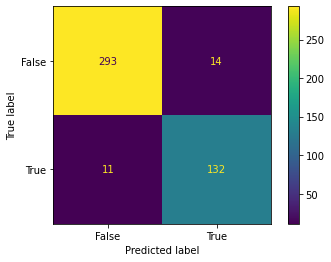

In [54]:
plot_confusion_matrix(gridt, X_testt, y_testt)  
plt.show()